In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [6]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [7]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(num_rows, num_cols)

73268 79


In [8]:
no_nulls = list(set(df.columns[df.isnull().mean() < 0.30]))
print(no_nulls)

['WebframeHaveWorkedWith', 'VCInteraction', 'NEWCollabToolsHaveWorkedWith', 'SOAccount', 'MainBranch', 'Gender', 'BuyNewTool', 'YearsCode', 'Age', 'OpSysPersonal use', 'EdLevel', 'OfficeStackSyncHaveWorkedWith', 'LanguageWantToWorkWith', 'MentalHealth', 'Accessibility', 'Ethnicity', 'CodingActivities', 'LanguageHaveWorkedWith', 'SurveyEase', 'ToolsTechHaveWorkedWith', 'Blockchain', 'SurveyLength', 'VersionControlSystem', 'TBranch', 'LearnCode', 'OpSysProfessional use', 'SOComm', 'RemoteWork', 'DevType', 'Sexuality', 'Employment', 'DatabaseHaveWorkedWith', 'SOPartFreq', 'Country', 'ResponseId', 'YearsCodePro', 'SOVisitFreq', 'NEWSOSites', 'Trans', 'NEWCollabToolsWantToWorkWith']


In [ ]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['qname'] == column_name]['question'])[0]
    return desc


for no_null in no_nulls:
    try:
        desc = get_description(no_null)
        print(no_null, desc)
    except:
        print(no_null, 'no descr')

In [9]:
# taken from https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    # Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1, 6, 2)]


def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [10]:
color1 = '#7AC5CD'
color2 = '#FFF7A7'

In [98]:
def plot_barh(dataframe, column_name, title):
    values = dataframe[f'{column_name}'].value_counts()
    allvalues = dataframe[dataframe[f'{column_name}'].notnull()].shape[0]
    share = values/allvalues*100
    share = share.sort_values(ascending=True)
    sns.set_style('white')  # darkgrid, white grid, dark, white and ticks
    plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
    colors = sns.color_palette("muted")
    plt.figure(figsize=(5, 7))
    plt.title(f'{title}', color='#1D3F6E', fontsize=16)
    ax = share.plot.barh(color=get_color_gradient(
        color2, color1, 8), fontsize=14, width=0.7)
    ax.axes.get_yaxis().set_visible(True)
    ax.axes.get_xaxis().set_visible(False)
    ax.bar_label(ax.containers[0], fmt='%.0f%%', fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(True)
    return ax

In [97]:
def plot_bar(dataframe, column_name, title):
    values = dataframe[f'{column_name}'].value_counts()
    allvalues = dataframe[dataframe[f'{column_name}'].notnull()].shape[0]
    share = values/allvalues*100
    share = share.sort_values(ascending=False)
    sns.set_style('white')  # darkgrid, white grid, dark, white and ticks
    plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
    colors = sns.color_palette("muted")
    plt.figure(figsize=(10, 4))
    plt.title(f'{title}', color='#1D3F6E', fontsize=16)
    ax = share.plot.bar(color=get_color_gradient(
        color1, color2, 8), fontsize=14, width=0.7)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(True)
    ax.bar_label(ax.containers[0], fmt='%.0f%%', fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    return ax

In [70]:
def plot_pie(dataframe, column_name, title):
    sns.set_style('white')  # darkgrid, white grid, dark, white and ticks
    plt.rc('font', size=14)          # controls default text sizes
    colors = sns.color_palette("muted")
    plt.figure(figsize=(4, 4))
    values = dataframe[f'{column_name}'].value_counts()
    allvalues = dataframe[dataframe[f'{column_name}'].notnull()].shape[0]
    share = values/allvalues*100
    share = share.sort_values(ascending=False)
    ax = share.plot.pie(colors=get_color_gradient(
        color1, color2, 8), autopct='%.0f%%', fontsize=12)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(f'{title}', color='#1D3F6E', fontsize=12)
    return ax

In [13]:
# making df1 our dataframe of choice and looking on number of empty values in each column

df1 = df[['ResponseId', 'Gender', 'MainBranch', 'YearsCodePro',
          'LearnCodeCoursesCert', 'BuyNewTool', 'DevType']]
df1.head()
df1.isnull().mean()

# df1.MainBranch.value_counts()

ResponseId              0.000000
Gender                  0.032961
MainBranch              0.000000
YearsCodePro            0.292556
LearnCodeCoursesCert    0.598884
BuyNewTool              0.072405
DevType                 0.163318
dtype: float64

# Question1: which course platforms for coding choose people who are primarily developers

In [14]:
df_dev_prof = df1.query('MainBranch == "I am a developer by profession"')
df_dev_prof.isnull().mean()
df_dev_prof.shape[0]
df_dev_prof.head(2)

,ResponseId,Gender,MainBranch,YearsCodePro,LearnCodeCoursesCert,BuyNewTool,DevType
1,2,NaN,I am a developer by profession,NaN,NaN,NaN,NaN
3,4,Man,I am a developer by profession,17,NaN,Other (please specify):,"Developer, full-stack"


In [15]:
# diving column "LearnCodeCoursesCert" by ';'
df_dev_prof = df_dev_prof.set_index(['ResponseId', 'Gender', 'MainBranch', 'YearsCodePro', 'BuyNewTool', 'DevType']).apply(
    lambda x: x.str.split(';').explode()).reset_index()
df_dev_prof.head(2)

,ResponseId,Gender,MainBranch,YearsCodePro,BuyNewTool,DevType,LearnCodeCoursesCert
0,2,NaN,I am a developer by profession,NaN,NaN,NaN,NaN
1,4,Man,I am a developer by profession,17,Other (please specify):,"Developer, full-stack",NaN


<AxesSubplot:>

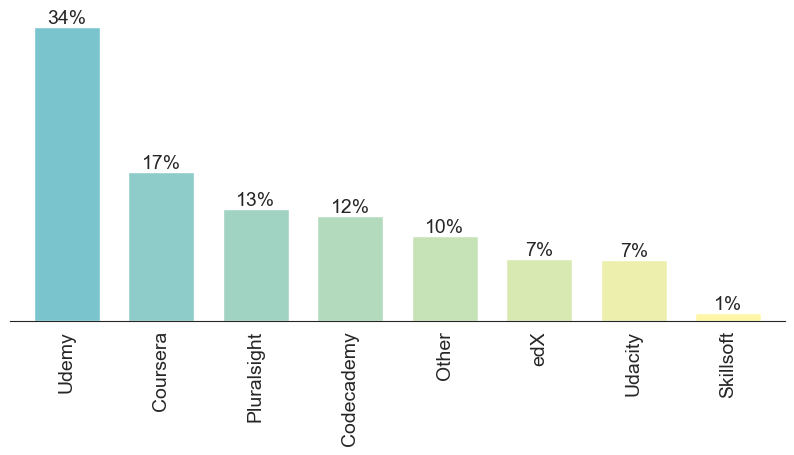

In [100]:
plot_bar(df_dev_prof, 'LearnCodeCoursesCert',
          '')

<AxesSubplot:title={'center':'7-10 years'}, ylabel='LearnCodeCoursesCert'>

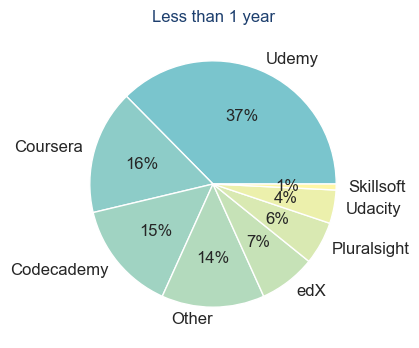

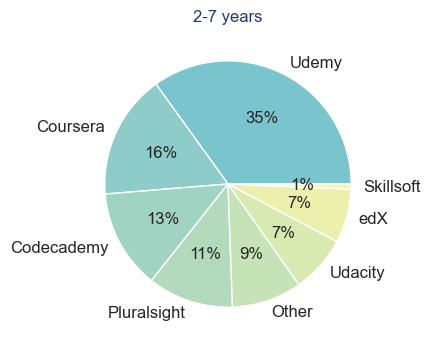

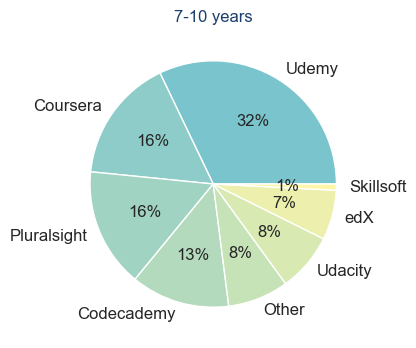

In [77]:
# diving professional developers by exeperience levels (years)


# less 1 year
first_less1 = df_dev_prof[df_dev_prof['YearsCodePro'] == 'Less than 1 year']
plot_pie(first_less1, 'LearnCodeCoursesCert', 'Less than 1 year')


# 2-7 years
first_2_7 = df_dev_prof[df_dev_prof['YearsCodePro'] != 'More than 50 years']
first_2_7 = first_2_7[first_2_7['YearsCodePro'] != 'Less than 1 year']
first_2_7['YearsCodePro'] = pd.to_numeric(first_2_7['YearsCodePro'])
first_2_7 = first_2_7[first_2_7['YearsCodePro'] >= 2]
first_2_7 = first_2_7[first_2_7['YearsCodePro'] < 7]
plot_pie(first_2_7, 'LearnCodeCoursesCert', '2-7 years')


# 7-10 years
first_7_10 = df_dev_prof[df_dev_prof['YearsCodePro'] != 'More than 50 years']
first_7_10 = first_7_10[first_7_10['YearsCodePro'] != 'Less than 1 year']
first_7_10['YearsCodePro'] = pd.to_numeric(first_7_10['YearsCodePro'])
first_7_10 = first_7_10[first_7_10['YearsCodePro'] >= 7]
first_7_10 = first_7_10[first_7_10['YearsCodePro'] < 10]
plot_pie(first_7_10, 'LearnCodeCoursesCert', '7-10 years')

In [23]:
df_dev_prof.head(3)

,ResponseId,Gender,MainBranch,YearsCodePro,BuyNewTool,DevType,LearnCodeCoursesCert
0,2,NaN,I am a developer by profession,NaN,NaN,NaN,NaN
1,4,Man,I am a developer by profession,17,Other (please specify):,"Developer, full-stack",NaN
2,5,NaN,I am a developer by profession,3,Start a free trial;Visit developer communities...,"Developer, front-end;Developer, full-stack;Dev...",NaN


In [24]:
df_dev_prof_ds = df_dev_prof.set_index(['ResponseId', 'MainBranch', 'Gender', 'YearsCodePro',
                                       'BuyNewTool', 'LearnCodeCoursesCert']).apply(lambda x: x.str.split(';').explode()).reset_index()

In [25]:
df_dev_prof_ds.DevType.value_counts()

Developer, full-stack                            39019
Developer, back-end                              36163
Developer, front-end                             22003
Developer, desktop or enterprise applications    12387
Developer, mobile                                10642
DevOps specialist                                 7952
Cloud infrastructure engineer                     6881
Database administrator                            6091
System administrator                              5188
Student                                           5140
Developer, embedded applications or devices       4989
Engineer, data                                    4729
Project manager                                   4515
Designer                                          4389
Data scientist or machine learning specialist     4222
Developer, QA or test                             4222
Engineering manager                               4035
Data or business analyst                          3726
Product ma

In [26]:
df_dev_prof_ds = df_dev_prof_ds.query(
    'DevType == "Data scientist or machine learning specialist"')

<AxesSubplot:>

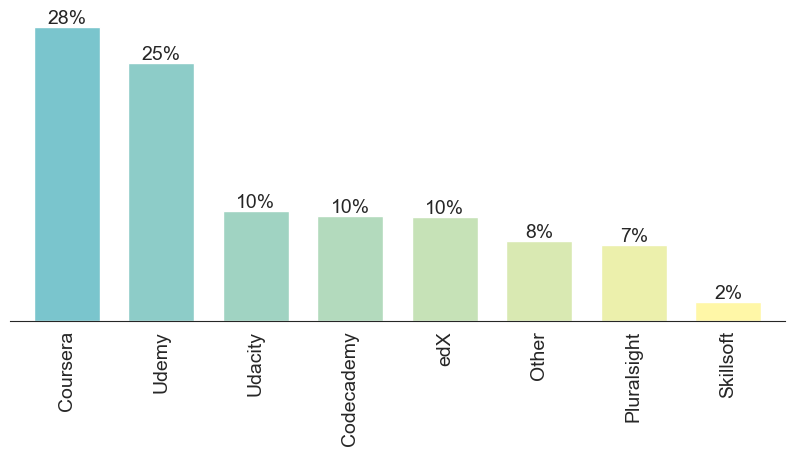

In [101]:
plot_bar(df_dev_prof_ds, 'LearnCodeCoursesCert',
          '')

# Question2: which course platforms for coding choose people who are non-professional developers

In [28]:
df_nodev = df1.query('MainBranch != "I am a developer by profession"')
df_nodev.shape[0]
df_nodev.head(2)

,ResponseId,Gender,MainBranch,YearsCodePro,LearnCodeCoursesCert,BuyNewTool,DevType
0,1,NaN,None of these,NaN,NaN,NaN,NaN
2,3,Man,"I am not primarily a developer, but I write co...",5,NaN,NaN,Data scientist or machine learning specialist;...


In [29]:
df_nodev = df_nodev.set_index(['ResponseId', 'Gender', 'MainBranch', 'YearsCodePro',
                              'BuyNewTool', 'DevType']).apply(lambda x: x.str.split(';').explode()).reset_index()
df_nodev.head(3)

,ResponseId,Gender,MainBranch,YearsCodePro,BuyNewTool,DevType,LearnCodeCoursesCert
0,1,NaN,None of these,NaN,NaN,NaN,NaN
1,3,Man,"I am not primarily a developer, but I write co...",5,NaN,Data scientist or machine learning specialist;...,NaN
2,6,"Or, in your own words:","I am not primarily a developer, but I write co...",NaN,Other (please specify):,NaN,NaN


<AxesSubplot:>

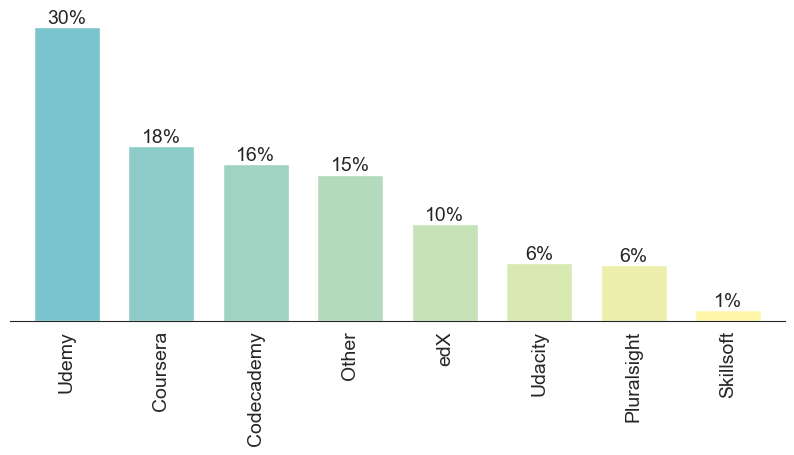

In [102]:
plot_bar(df_nodev, 'LearnCodeCoursesCert',
          '')

In [104]:
# who chooses udemy
df_dev_prof.query('LearnCodeCoursesCert == "Udemy"').DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                 2055
Developer, back-end                                                                                                                                                                                                                                                                                   1373
Developer, front-end                                                                                                                                                                                                                                                                                   952
Developer, front-end;Developer, full-stack;Developer, back-end                                         

In [103]:
# who chooses pluralsight
df_dev_prof.query(
    'LearnCodeCoursesCert == "Pluralsight"').DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                      840
Developer, back-end                                                                                                                                                                                                        491
Developer, front-end                                                                                                                                                                                                       264
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                                             260
Developer, full-stack;Developer, back-end                                                                   

# Q3: how developers buy new tools

In [33]:
df['BuyNewTool'].value_counts()

Start a free trial;Visit developer communities like Stack Overflow;Ask developers I know/work with                                                                              11787
Start a free trial;Ask developers I know/work with                                                                                                                               7454
Start a free trial;Visit developer communities like Stack Overflow;Ask developers I know/work with;Read ratings or reviews on third party sites like G2Crowd                     5377
Start a free trial                                                                                                                                                               5210
Visit developer communities like Stack Overflow;Ask developers I know/work with                                                                                                  4886
                                                                                          

In [34]:
df_dev_prof.head(10)

,ResponseId,Gender,MainBranch,YearsCodePro,BuyNewTool,DevType,LearnCodeCoursesCert
0,2,NaN,I am a developer by profession,NaN,NaN,NaN,NaN
1,4,Man,I am a developer by profession,17,Other (please specify):,"Developer, full-stack",NaN
2,5,NaN,I am a developer by profession,3,Start a free trial;Visit developer communities...,"Developer, front-end;Developer, full-stack;Dev...",NaN
3,8,Man,I am a developer by profession,NaN,Start a free trial,"Developer, full-stack;Student",Coursera
4,8,Man,I am a developer by profession,NaN,Start a free trial,"Developer, full-stack;Student",Udemy
5,9,Woman,I am a developer by profession,6,NaN,"Developer, back-end",NaN
6,10,Woman,I am a developer by profession,30,Start a free trial;Ask developers I know/work ...,"Developer, desktop or enterprise applications;...",NaN
7,11,Man,I am a developer by profession,2,Start a free trial;Visit developer communities...,"Developer, full-stack;Developer, back-end",NaN
8,13,Man,I am a developer by profession,5,Visit developer communities like Stack Overflow,"Developer, full-stack",NaN
9,14,Woman,I am a developer by profession,15,Start a free trial;Ask developers I know/work ...,"Developer, front-end;Developer, full-stack;Dev...",NaN


In [35]:
df_buynew = df_dev_prof.set_index(['ResponseId', 'MainBranch', 'Gender', 'YearsCodePro',
                                  'DevType', 'LearnCodeCoursesCert']).apply(lambda x: x.str.split(';').explode()).reset_index()

<AxesSubplot:>

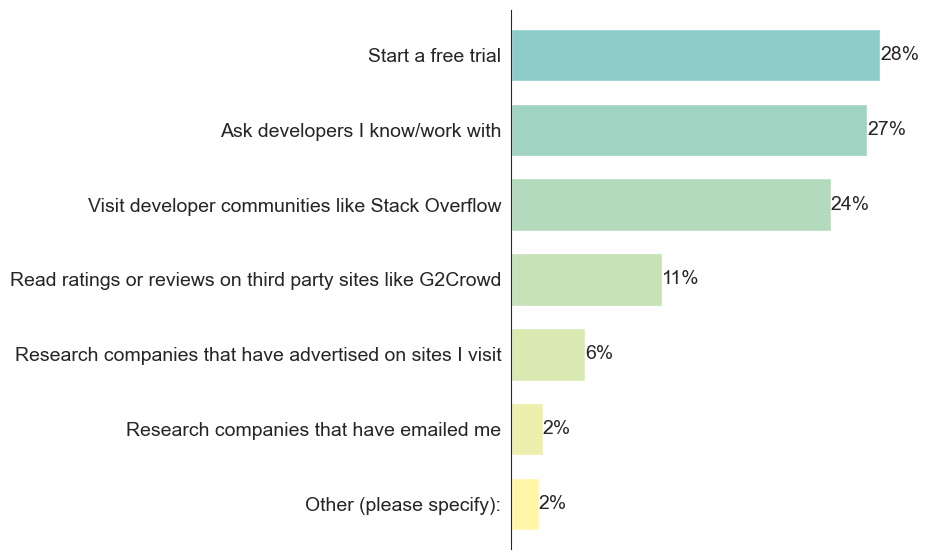

In [99]:
plot_barh(df_buynew, 'BuyNewTool', '')